In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#converting the target variable into number so that it can be interpreted 
data["class"].replace({"p":0,"e":1},inplace=True)

In [6]:
#encoding the data which is all  in alphabets 
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# The data is all good to go , consists of no null values and no aplhanumeric data 

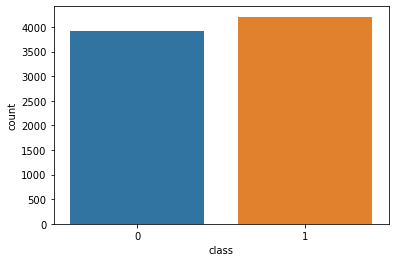

In [42]:
#making sure the model is not biased towards a particular output.
sns.countplot(data["class"],data=data)
x=data.drop("class",axis=1)
y=data["class"]

In [28]:
# Having plotted the heatmap and checked for correlations , their has been observed no such trend that any of the feature
#could be dropped under the name of collinearity.


best_features=SelectKBest(score_func=f_classif,k=15)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(15,"Scores_obtained"))

                Column_names  Scores_obtained
7                  gill-size      3343.700439
8                 gill-color      3182.110596
3                    bruises      2729.510254
18                 ring-type      1658.307007
10                stalk-root      1365.373901
6               gill-spacing      1121.971924
11  stalk-surface-above-ring      1023.906250
12  stalk-surface-below-ring       796.237427
20                population       795.558777
21                   habitat       402.052460
17               ring-number       391.206696
1                cap-surface       267.136200
19         spore-print-color       247.489716
13    stalk-color-above-ring       197.297867
14    stalk-color-below-ring       178.710388


In [29]:
#taking the best 17 features and inserting it in a dataframe named df
df=data[["gill-size","gill-color","bruises","ring-type","ring-type","stalk-root","gill-spacing","stalk-surface-above-ring","stalk-surface-below-ring","population",
        "habitat","ring-number","cap-surface","spore-print-color","stalk-color-above-ring","stalk-color-below-ring"]]

In [30]:
df.head()

,gill-size,gill-color,bruises,ring-type,ring-type,stalk-root,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,habitat,ring-number,cap-surface,spore-print-color,stalk-color-above-ring,stalk-color-below-ring
0,1,4,1,4,4,3,0,2,2,3,5,1,2,2,7,7
1,0,4,1,4,4,2,0,2,2,2,1,1,2,3,7,7
2,0,5,1,4,4,2,0,2,2,2,3,1,2,3,7,7
3,1,5,1,4,4,3,0,2,2,3,5,1,3,2,7,7
4,0,4,0,0,0,3,1,2,2,0,1,1,2,3,7,7


In [31]:
scaler=StandardScaler()
df=scaler.fit_transform(df)
df

array([[ 1.49468272, -0.22899776,  1.18591657, ..., -0.67019486,
         0.62244139,  0.63199138],
       [-0.66903831, -0.22899776,  1.18591657, ..., -0.2504706 ,
         0.62244139,  0.63199138],
       [-0.66903831,  0.05347685,  1.18591657, ..., -0.2504706 ,
         0.62244139,  0.63199138],
       ...,
       [-0.66903831,  0.05347685, -0.84322964, ..., -1.50964337,
        -0.42928778, -0.41668059],
       [ 1.49468272, -1.35889624, -0.84322964, ...,  1.42842641,
         0.62244139,  0.63199138],
       [-0.66903831,  1.74832457, -0.84322964, ...,  0.16925365,
        -0.42928778, -0.41668059]])

In [32]:
from time import time
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.25,random_state=43)

In [33]:
Knn=KNeighborsClassifier()
start=time()
Knn.fit(x_train,y_train)
print("Training time:",time()-start)
start=time()
y_pres=Knn.predict(x_test)
print("Testing time:",time()-start)


Training time: 0.1387343406677246
Testing time: 0.4980466365814209


In [34]:
cfm=confusion_matrix(y_test,y_pres)
cfm


array([[1001,    0],
       [   0, 1030]], dtype=int64)

In [35]:
#getting the accuracy report of the predicted data and the acctual data 
print(classification_report(y_test,y_pres))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00      1030

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# checking weather model is overfitting 

In [38]:
cross_val_score(Knn,df,y,cv=10)

array([0.68511685, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.7955665 , 1.        ])

In [41]:
cross_val_score(Knn,df,y,cv=15).mean()

0.9674021730975165

In [ ]:
#thank you .